In [19]:

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [116]:


filename = 'simu_fold0_20220802_014151'
sub = '/generated_outputs_nsample20.pk'
path = './save/'+filename+sub

with open(path, 'rb') as f:
    data = pickle.load(f)

In [117]:
all_generated_samples = data[0].cpu().numpy()
all_obs= data[1].cpu().numpy()
all_target_mask = data[2].cpu().numpy()
all_observed_mask = data[3].cpu().numpy()


In [118]:
def mask_to_idx(mask,K):
    _,L,_ = mask.shape
    target_idx = np.argwhere(all_target_mask[0,:,K]).squeeze()
    cond_index_1 = np.arange(0,target_idx[0]+1)
    cond_index_2 = np.arange(target_idx[-1],L)

    return target_idx, cond_index_1, cond_index_2
    

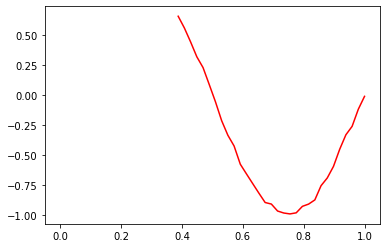

In [110]:

L = 50
T_array = np.linspace(0,1,L)
K=0

# plt.plot(T_array,all_observed_point.mean(0).cpu())

target_idx, cond_index_1, cond_index_2 = mask_to_idx(all_target_mask,K)

plt.plot(T_array[cond_index_1],all_obs[1,cond_index_1,K],'red')
plt.plot(T_array[cond_index_2],all_obs[1,cond_index_2,K],'red')

# plt.plot(T_array[target_idx],all_generated_samples[:20,0,target_idx,K].T)





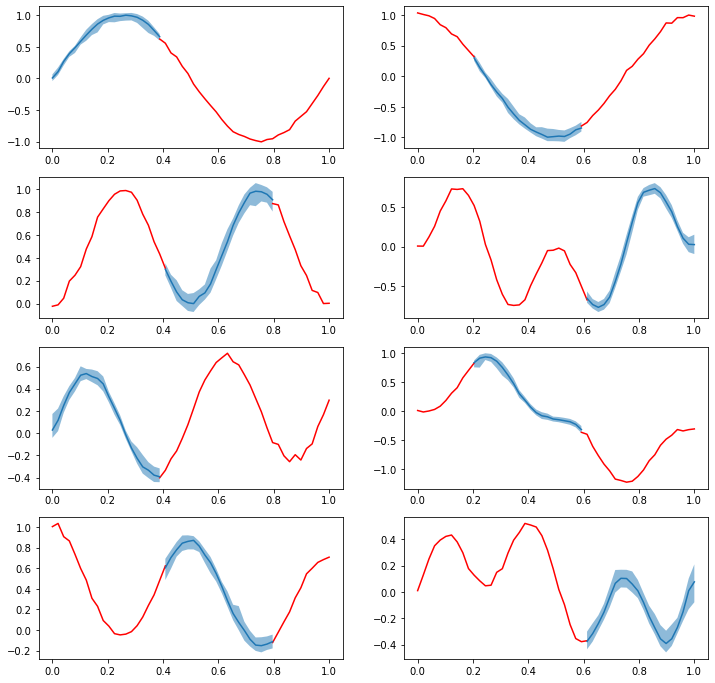

In [119]:
# Initialize plots
f, ax_set = plt.subplots(4, 2, figsize=(12,12))

L = 50
T_array = np.linspace(0,1,L)

for K in range(8):
    
    target_idx, cond_index_1, cond_index_2 = mask_to_idx(all_target_mask,K)

    ax = ax_set.flatten()[K]

    ax.plot(T_array[cond_index_1],all_obs[1,cond_index_1,K],'red')
    ax.plot(T_array[cond_index_2],all_obs[1,cond_index_2,K],'red')

    # ax.plot(T_array[target_idx],all_generated_samples[:20,0,target_idx,K].T)
    median = np.quantile(all_generated_samples[:,0,target_idx,K],0.5,0)
    quamt_95 = np.quantile(all_generated_samples[:,0,target_idx,K],0.95,0)
    quamt_5 = np.quantile(all_generated_samples[:,0,target_idx,K],0.05,0)

    ax.plot(T_array[target_idx],median.squeeze())
    ax.fill_between(T_array[target_idx], quamt_5, quamt_95 , alpha=0.5)


In [96]:
mean_pred = all_generated_samples[:20,0,target_idx,K].mean(0)
std = all_generated_samples[:20,0,target_idx,K].std(0)

In [99]:
median = np.quantile(all_generated_samples[:20,0,target_idx,K],0.5,0)
quamt_95 = np.quantile(all_generated_samples[:20,0,target_idx,K],0.95,0)
quamt_5 = np.quantile(all_generated_samples[:20,0,target_idx,K],0.05,0)